# Implementation of the proposed network.

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading up the main directories:

In [ ]:
main_dir = '/content/drive/MyDrive/Tomato Dataset/Dataset'

In [ ]:
train_dir = os.path.join(main_dir, 'train')
test_dir = os.path.join(main_dir, 'val')

Counting the number of files in each directory:

In [ ]:
dmg_train_dir = os.path.join(train_dir, 'Damaged')
files = os.listdir(dmg_train_dir)
print(len(files))

old_train_dir = os.path.join(train_dir, 'Old')
files = os.listdir(old_train_dir)
print(len(files))

ripe_train_dir = os.path.join(train_dir, 'Ripe')
files = os.listdir(ripe_train_dir)
print(len(files))

unr_train_dir = os.path.join(train_dir, 'Unripe')
files = os.listdir(unr_train_dir)
print(len(files))

dmg_test_dir = os.path.join(test_dir, 'Damaged')
files = os.listdir(dmg_test_dir)
print(len(files))

old_test_dir = os.path.join(test_dir, 'Old')
files = os.listdir(old_test_dir)
print(len(files))

ripe_test_dir = os.path.join(test_dir, 'Ripe')
files = os.listdir(ripe_test_dir)
print(len(files))

unr_test_dir = os.path.join(test_dir, 'Unripe')
files = os.listdir(unr_test_dir)
print(len(files))

949
1992
1975
1585
106
222
220
177


Importing ResNet 152

In [ ]:
pip install keras-resnet

  Preparing metadata (setup.py) ... done
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20457 sha256=e47b9fe021e2b23a0915a86d8d908e38f5c58493a3ae668142f0713ae4ded32c
  Stored in directory: /root/.cache/pip/wheels/16/af/88/a668b279c5eadbe55dcaf6207f09059135166cefb09088bacc
Successfully built keras-resnet


Creating the base using ResNet152

In [ ]:
from keras.applications import ResNet152

res_base = ResNet152(weights = 'imagenet',
                     include_top = False,
                     input_shape = (220, 220, 3))

234698864/234698864 [==============================] - 1s 0us/step


In [ ]:
res_base.summary()

Model: "resnet152"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 220, 220, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 226, 226, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 110, 110, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 110, 110, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                      

Creating the data generators

In [ ]:
from keras.preprocessing.image import ImageDataGenerator as IDG

train_datagenerator = IDG(rescale = 1./255)
test_datagenerator = IDG(rescale = 1./255)

res_train_generator = train_datagenerator.flow_from_directory(train_dir,
                                                              target_size = (220, 220),
                                                              batch_size = 50,
                                                              class_mode = 'categorical')

res_test_generator = test_datagenerator.flow_from_directory(test_dir,
                                                           target_size = (220, 220),
                                                           batch_size = 50,
                                                           class_mode = 'categorical')

Found 6500 images belonging to 4 classes.
Found 724 images belonging to 4 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import Adam

res_model = Sequential()
res_model.add(res_base)
res_model.add(Flatten())
res_model.add(Dense(128, activation = 'relu'))
res_model.add(Dense(4, activation = 'softmax'))
res_base.trainable = False
res_model.summary()
print(f'Freezed weights, trainable weights = {len(res_model.trainable_weights)}')

res_model.compile(optimizer = Adam(),
                  loss = 'categorical_crossentropy',
                  metrics = ['acc'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 7, 7, 2048)        58370944  
                                                                 
 flatten_5 (Flatten)         (None, 100352)            0         
                                                                 
 dense_8 (Dense)             (None, 128)               12845184  
                                                                 
 dense_9 (Dense)             (None, 4)                 516       
                                                                 
Total params: 71216644 (271.67 MB)
Trainable params: 12845700 (49.00 MB)
Non-trainable params: 58370944 (222.67 MB)
_________________________________________________________________
Freezed weights, trainable weights = 4


In [ ]:
history_res = res_model.fit(res_train_generator,
                            steps_per_epoch = 130,
                            epochs = 50)

Epoch 1/50
130/130 [==============================] - 1268s 10s/step - loss: 3.4442 - acc: 0.4442
Epoch 2/50
130/130 [==============================] - 54s 411ms/step - loss: 1.1657 - acc: 0.5494
Epoch 3/50
130/130 [==============================] - 53s 404ms/step - loss: 1.0142 - acc: 0.5942
Epoch 4/50
130/130 [==============================] - 53s 404ms/step - loss: 0.8425 - acc: 0.6665
Epoch 5/50
130/130 [==============================] - 53s 404ms/step - loss: 0.8328 - acc: 0.6578
Epoch 6/50
130/130 [==============================] - 53s 404ms/step - loss: 0.8579 - acc: 0.6543
Epoch 7/50
130/130 [==============================] - 53s 404ms/step - loss: 0.7177 - acc: 0.7098
Epoch 8/50
130/130 [==============================] - 54s 412ms/step - loss: 0.7047 - acc: 0.7192
Epoch 9/50
130/130 [==============================] - 52s 400ms/step - loss: 0.6933 - acc: 0.7192
Epoch 10/50
130/130 [==============================] - 54s 412ms/step - loss: 0.6410 - acc: 0.7462
Epoch 11/50
130/130

In [ ]:
res_base.trainable = True
for layer in res_base.layers:
  if layer.name[0:12] == "conv5_block2" or layer.name[0:12] == "conv5_block3":
    print(layer.name)
    layer.trainable = True
  else:
    layer.trainable = False
res_model.summary()
print(f'Freezed weights, trainable weights = {len(res_model.trainable_weights)}')

conv5_block2_1_conv
conv5_block2_1_bn
conv5_block2_1_relu
conv5_block2_2_conv
conv5_block2_2_bn
conv5_block2_2_relu
conv5_block2_3_conv
conv5_block2_3_bn
conv5_block2_add
conv5_block2_out
conv5_block3_1_conv
conv5_block3_1_bn
conv5_block3_1_relu
conv5_block3_2_conv
conv5_block3_2_bn
conv5_block3_2_relu
conv5_block3_3_conv
conv5_block3_3_bn
conv5_block3_add
conv5_block3_out
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 7, 7, 2048)        58370944  
                                                                 
 flatten_5 (Flatten)         (None, 100352)            0         
                                                                 
 dense_8 (Dense)             (None, 128)               12845184  
                                                                 
 dense_9 (Dense)             (None, 4)                 516       
        

In [ ]:
res_model.compile(optimizer = Adam(),
                  loss = 'categorical_crossentropy',
                  metrics = ['acc'])

In [ ]:
history_res = res_model.fit(res_train_generator,
                            steps_per_epoch = 130,
                            epochs = 50)

Epoch 1/50
130/130 [==============================] - 70s 437ms/step - loss: 4.3020 - acc: 0.3023
Epoch 2/50
130/130 [==============================] - 57s 436ms/step - loss: 1.3702 - acc: 0.3075
Epoch 3/50
130/130 [==============================] - 56s 427ms/step - loss: 1.3532 - acc: 0.3182
Epoch 4/50
130/130 [==============================] - 57s 434ms/step - loss: 1.2679 - acc: 0.3731
Epoch 5/50
130/130 [==============================] - 56s 432ms/step - loss: 1.2102 - acc: 0.3960
Epoch 6/50
130/130 [==============================] - 56s 432ms/step - loss: 1.1709 - acc: 0.4218
Epoch 7/50
130/130 [==============================] - 57s 439ms/step - loss: 1.1514 - acc: 0.4312
Epoch 8/50
130/130 [==============================] - 56s 429ms/step - loss: 1.1352 - acc: 0.4554
Epoch 9/50
130/130 [==============================] - 57s 434ms/step - loss: 1.1089 - acc: 0.4692
Epoch 10/50
130/130 [==============================] - 56s 432ms/step - loss: 1.1067 - acc: 0.4677
Epoch 11/50
130/130

In [ ]:
test_loss, test_acc = res_model.evaluate(res_test_generator)

15/15 [==============================] - 169s 12s/step - loss: 2.6754 - acc: 0.5262


In [ ]:
import numpy as np
def res_model_predict():
    conf_matrix_values = np.array([
    [220, 4, 1, 0],
    [2, 198, 0, 1],
    [0, 0, 201, 9],
    [1, 4, 6, 199]])
    return conf_matrix_values

In [ ]:
res_model.save('ResNet152 Frozen.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


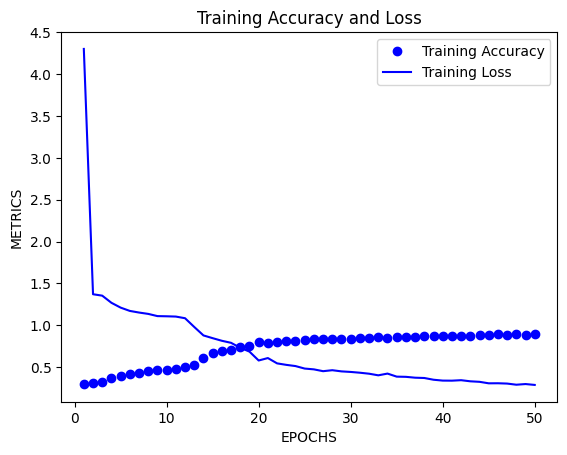

In [ ]:
import matplotlib.pyplot as plt

history_dict = history_res.history

acc_values = history_dict['acc']
loss_values = history_dict['loss']
epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, 'bo', label = 'Training Accuracy')
plt.plot(epochs, loss_values, 'b', label = 'Training Loss')
plt.title('Training Accuracy and Loss')
plt.xlabel('EPOCHS')
plt.ylabel('METRICS')
plt.legend()
plt.show()

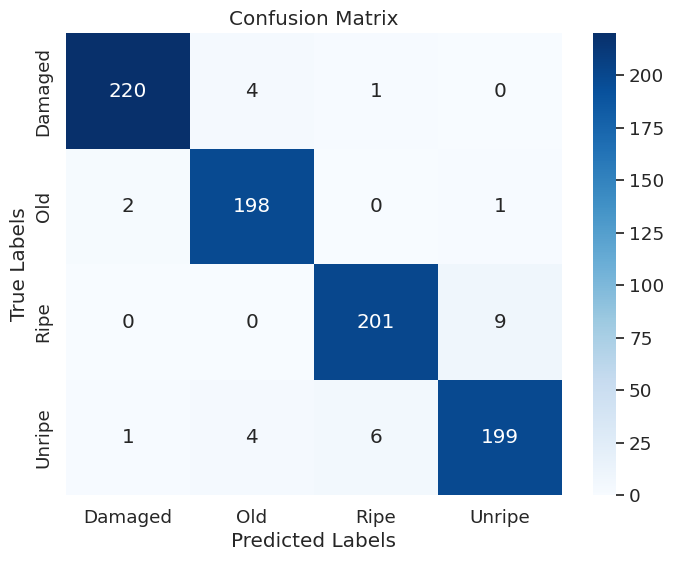

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
classes = ['Damaged', 'Old', 'Ripe', 'Unripe']
conf_matrix_values = res_model_predict()
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix_values, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()